<center><h1>Supplement S4 of</h1><h2>Categorical Perception of Fear and Anger Expressions in Whole,<br>Masked and Composite Faces.</h2></center>
<br>

# Fitting Functions and Getting Derivatives

This script fits a logistic function to the raw data of each participant.



## Import Modules

In [1]:
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

import pandas as pd
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 1000)

import os
import fnmatch

import seaborn as sns
sns.set_style("ticks")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load CSV file and tranform back to DataFrame

In [2]:
def get_table(whichfolder, whichfile):
    #os.chdir(whichfolder)
    loglist = []
    for fileName in os.listdir(whichfolder):
        if fnmatch.fnmatch(fileName, whichfile):
            loglist.append(whichfolder+fileName)
    return loglist

In [3]:
my_folder = './data/'
my_df = '*.txt'
dflist = get_table(my_folder,my_df)
dflist.sort()

In [4]:
i = 0
for df in dflist:
    print i,':',df
    i+=1

0 : ./data/Exp1AvgResults.txt
1 : ./data/Exp1AvgResultsAll.txt
2 : ./data/Exp1Pt1MainResults.txt
3 : ./data/Exp1Pt1ResultsAll.txt
4 : ./data/Exp1Pt2MainResults.txt
5 : ./data/Exp1Pt2ResultsAll.txt
6 : ./data/Exp1RtMedian.txt
7 : ./data/Exp1RtMedianAll.txt
8 : ./data/Exp2AvgResults.txt
9 : ./data/Exp2AvgResultsAll.txt
10 : ./data/Exp2Pt1Results.txt
11 : ./data/Exp2Pt1ResultsAll.txt
12 : ./data/Exp2Pt2Results.txt
13 : ./data/Exp2Pt2ResultsAll.txt
14 : ./data/Exp2RtMedian.txt
15 : ./data/Exp2RtMedianAll.txt


In [5]:
exp1Results = pd.read_csv(dflist[0],
                 header=[0,1],
                 index_col=[0])/100

In [6]:
cols = exp1Results.columns.tolist()
cols = [ cols[0:11]+cols[22:33]+cols[11:22] ]
exp1Results = exp1Results[cols[0]]

In [7]:
exp1Results

whole                                                                 \
grade    m00    m01    m02    m03    m04    m05    m06    m07    m08    m09   
p                                                                             
p001   0.125  0.175  0.250  0.200  0.275  0.600  0.675  0.950  0.975  1.000   
p002   0.150  0.000  0.050  0.150  0.225  0.375  0.575  0.700  0.875  0.900   
p003   0.125  0.150  0.150  0.200  0.475  0.675  0.775  0.975  1.000  1.000   
p004   0.050  0.075  0.200  0.125  0.325  0.325  0.600  0.800  0.875  0.850   
p005   0.000  0.000  0.100  0.150  0.200  0.225  0.450  0.600  0.825  0.775   
p006   0.050  0.075  0.025  0.075  0.175  0.450  0.775  0.950  0.950  1.000   
p007   0.125  0.100  0.150  0.225  0.150  0.325  0.600  0.800  0.900  0.950   
p008   0.175  0.275  0.250  0.300  0.425  0.600  0.625  0.900  0.950  0.950   
p009   0.050  0.025  0.000  0.050  0.250  0.350  0.625  0.800  0.950  0.975   
p010   0.150  0.225  0.300  0.275  0.250  0.600  0.700  0.850  0.975  0.950   
p011   0.025  0.100  0.100  0.075  0.200  0.400  0.775  0.900  0.925  0.950   
p012   0.125  0.075  0.250  0.375  0.475  0.675  0.850  1.000  0.950  1.000   
p013   0.025  0.025  0.025  0.125  0.225  0.275  0.625  0.725  0.900  0.925   
p014   0.050  0.025  0.100  0.100  0.225  0.500  0.625  0.825  0.975  0.975   
p015   0.075  0.050  0.100  0.175  0.350  0.375  0.675  0.825  0.950  0.975   
p016   0.100  0.050  0.100  0.175  0.275  0.475  0.625  0.800  0.900  1.000   
p019   0.050  0.025  0.100  0.075  0.225  0.525  0.775  0.950  0.975  1.000   
p020   0.275  0.275  0.325  0.350  0.400  0.600  0.725  0.750  0.875  0.900   
p021   0.025  0.025  0.050  0.100  0.175  0.325  0.450  0.700  0.850  0.950   
p022   0.050  0.050  0.100  0.175  0.325  0.475  0.600  0.775  0.950  1.000   
p023   0.075  0.025  0.125  0.200  0.325  0.525  0.750  0.900  0.975  1.000   
p024   0.100  0.175  0.150  0.200  0.275  0.550  0.800  0.925  0.975  0.975   
p025   0.200  0.175  0.275  0.225  0.425  0.500  0.600  0.700  0.750  0.900   
p026   0.075  0.075  0.050  0.075  0.225  0.475  0.700  0.875  0.975  1.000   
p027   0.075  0.175  0.200  0.300  0.325  0.500  0.750  0.925  0.925  1.000   
p028   0.075  0.025  0.025  0.150  0.250  0.275  0.550  0.700  0.850  0.975   
p029   0.000  0.050  0.050  0.075  0.225  0.250  0.650  0.675  0.825  0.900   
p030   0.350  0.375  0.400  0.525  0.450  0.650  0.850  0.850  1.000  0.950   

               eyes                                                          \
grade    m10    m00    m01    m02    m03    m04    m05    m06    m07    m08   
p                                                                             
p001   1.000  0.125  0.050  0.175  0.225  0.425  0.425  0.650  0.850  0.900   
p002   0.975  0.225  0.250  0.275  0.350  0.450  0.600  0.725  0.825  0.900   
p003   1.000  0.300  0.375  0.450  0.625  0.700  0.750  0.875  0.850  0.850   
p004   0.875  0.225  0.275  0.375  0.275  0.375  0.575  0.675  0.575  0.775   
p005   0.850  0.050  0.025  0.150  0.275  0.250  0.350  0.525  0.600  0.825   
p006   1.000  0.050  0.075  0.075  0.050  0.350  0.400  0.700  0.825  0.975   
p007   0.975  0.100  0.100  0.200  0.225  0.250  0.450  0.600  0.700  0.850   
p008   1.000  0.150  0.150  0.300  0.325  0.300  0.425  0.650  0.800  0.975   
p009   1.000  0.025  0.025  0.050  0.150  0.225  0.450  0.550  0.875  0.850   
p010   1.000  0.175  0.350  0.375  0.375  0.400  0.400  0.525  0.700  0.875   
p011   1.000  0.050  0.050  0.075  0.100  0.275  0.250  0.450  0.800  0.900   
p012   0.950  0.250  0.275  0.325  0.250  0.450  0.550  0.625  0.700  0.875   
p013   0.950  0.000  0.125  0.150  0.175  0.250  0.350  0.575  0.775  0.925   
p014   1.000  0.050  0.075  0.100  0.250  0.300  0.500  0.625  0.800  0.950   
p015   1.000  0.125  0.075  0.075  0.350  0.225  0.425  0.525  0.650  0.750   
p016   1.000  0.050  0.150  0.175  0.175  0.225  0.425  0.625  0.825  0.950   
p019   1.000  0.075  0.050  0.150  0.225  0.300  0.475  

## Fit a Logistic Function to the Identification Data

<!-- <div align="center"; style="font-size: 20px">Logistic/Sigmoid Function:<br><br><br></div> -->
<!-- <div align="center"; style="font-size: 30px">$F(x;{\alpha},{\beta})=\frac{1}{1+exp(- {\beta}(x-{\alpha}))}$</div> -->

Logistic Function: $F(x;{\alpha},{\beta})=\frac{1}{1+exp(- {\beta}(x-{\alpha}))}$

In [8]:
def logistic(x,a,b):
    y = 1 / (1 + np.exp(-b*(x-a)))
    return y

Intercept and slope of the best-fitting logistic function are determined interatively by using scipy's curve_fit function.

In [9]:
def fitFunc(func,ydata):
    # for all designs in this study, there are 11 morphing steps, scaled between 0 and 1
    x = np.arange(0,len(ydata)/10.,0.1)
    # the scipy curvefit function is used here
    popt, pcov = curve_fit(func, x, ydata, maxfev=100000)

    intercept = popt[0] # intercept
    slope = popt[1]     # slope
    
    return intercept,slope

Example:

In [10]:
exampleData = [0,0,0.2,0.3,0.3,0.5,0.7,0.7,0.8,1,1]

In [11]:
fitFunc(logistic,exampleData)

(0.49999999998800071, 6.0566394648348618)

These parameters and the definition of the logistic function can be used to generate the
logistic curve for this data set:

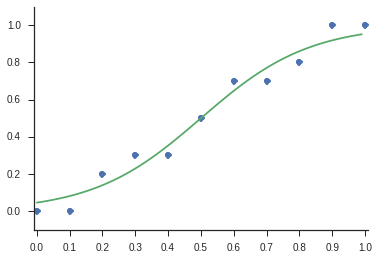

In [12]:
# get parameters
intercept,slope=fitFunc(logistic,exampleData)
# make fine-grained logistic function (100 steps)
exampleLog = []
for x in np.arange(0,1,0.01):
    exampleLog.append(logistic(x,intercept,slope))
# plot the raw data and adapt x axis to match the
# fine-grained resolution of the fitted function
plot(np.arange(0,101,10),exampleData,'o')
# plot the logistic function
plot(exampleLog)
# label x-axis
xticks(np.arange(0,101,10),np.arange(0,1.01,0.1))
# scale x- and y-axis
ylim(-0.1,1.1); xlim(-1,101)
sns.despine()
show()

##Recaling the data before fitting

The steepest point of the logistic curve is at 0.5 or 50%. This means that if a response is strongly shifted/biased in a way that it never crosses 50%, this will acutually lead to shallow slopes. Since we do not want the overall response level to influence our estimate of the slope parameter, we first rescale the data so that the lowest value becomes 0% and the highest value 100%. Thereby, even strongly shifted responses (as in Experiment 2) will be treated in a fair way when estimating the slope parameter.

###Short Example of the Issue:

If the responses never cross 50%, the logistic function becomes wide and the 50% value is acutally somewhere outside the response range. Therfore, the steepest point in the actual data is not found and secondly, the slope of the fitted function is very shallow because the function needs to be so wide to accomodate the data.

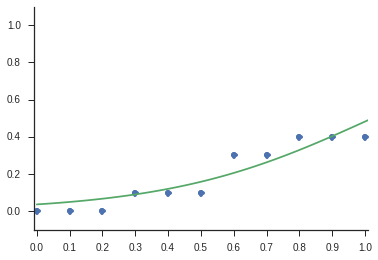

In [13]:
exampleData = [0,0,0,0.1,0.1,0.1,0.3,0.3,0.4,0.4,0.4]

intercept,slope=fitFunc(logistic,exampleData)
exampleLog = []
for x in np.arange(0,3,0.01):
    exampleLog.append(logistic(x,intercept,slope))
plot(np.arange(0,101,10),exampleData,'o')
plot(exampleLog)
xticks(np.arange(0,101,10),np.arange(0,1.01,0.1))
ylim(-0.1,1.1); xlim(-1,101)
sns.despine()
show()

The larger picture (the threshold is actually outside the response range):

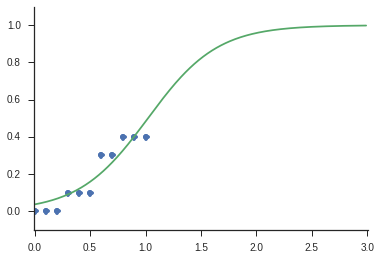

In [14]:
plot(np.arange(0,101,10),exampleData,'o')
plot(exampleLog)
xticks(np.arange(0,301,50),np.arange(0,3.01,0.5))
ylim(-0.1,1.1); xlim(-1,301)
sns.despine()
show()

##Rescaling the data to their range

The logistic function will be fitted to these rescaled data

In [15]:
def transformData(thisList):
    # the starting values are choses in such a way,
    # that the lowest value can only decrease (starts high)
    # and the highest value can only increase (starts low)
    lowest = 100
    highest = 0

    # we move through the list and update
    # the highest and lowest value, once we
    # encounter an entry that is higher or lower, respectively
    for x in thisList:
        if x < lowest:
            lowest = x
        if x > highest:       
            highest = x
    
    # the difference between highest and lowest is the span
    span = highest-lowest

    # the new rescaled data are written
    newList = []
    for x in thisList:
        # we get the distance from the lowest point and
        # rescale by the span of highest-lowest
        # e.g. the lowest point is 5 the highest is 10
        # the value 6 will be rescaled to (6-5)/5 = 1/5 = 20%
        newPoint = (float(x)-lowest)/span
        newList.append(newPoint)
        
    return newList,lowest,span

###Transforming the rescaled data back to their original space

This will be used to transform the fitted logistic function back to the native space

In [16]:
def transformBack(newList,lowest,span):
    oldList = []
    for x in newList:
        oldPoint = float(x)*span+lowest
        oldList.append(oldPoint)
    return oldList

Example:

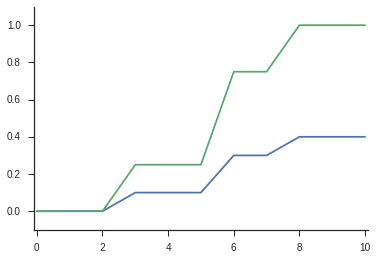

In [17]:
plot(exampleData)
plot(transformData(exampleData)[0])
ylim(-0.1,1.1);xlim(-0.1,10.1)
sns.despine()
show()

Checking if scaling back restores the original data:

In [18]:
newX,lowest,span=transformData(exampleData)
assert transformBack(newX,lowest,span) == exampleData, "rescaling produces an error!"

###The logistic is fitted to the rescaled data and transformed to the range of the original data in the aftermath

In [19]:
def rescaledFunc(thisData):
    #rescale the data
    newData,lowest,span = transformData(thisData)
    # fit a logistic function to the rescaled data
    # and extract intercept and slope of the function
    intercept,slope=fitFunc(logistic,newData)
    # use these parameters to make a logistic curve
    logData = []
    for x in np.arange(0,1.0001,0.0001):
        logData.append(logistic(x,intercept,slope))
    
    # scale the logistic curve back to the original dimensions
    nativeLog = transformBack(logData,lowest,span)
    
    return nativeLog

Fitting to the original data for comparison:

In [20]:
def originalFunc(thisData):
    intercept,slope = fitFunc(logistic,thisData)
    rawLog = []
    for x in np.arange(0,1.0001,0.0001):
        rawLog.append(logistic(x,intercept,slope))
    return rawLog

###Checking the effect this has with an example:

We see that when we rescale the data, fit the function and scale the function back to the native space,
we get a much better estimate of the slope and also - importantly- the position of the intercept in our acutal data; before, the intercept was located bascially in an extrapolated data space (which could be thought of as a "caricature", hence more than 100% fear/anger), far away on the x-axis.

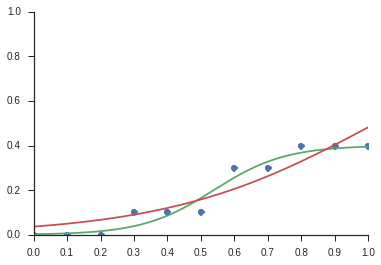

In [21]:
plot(np.arange(0,10001,1000),exampleData,'o')
plot(rescaledFunc(exampleData))
plot(originalFunc(exampleData))
xticks(np.arange(0,10001,1000),np.arange(0,1.1,0.1))
ylim(0,1)
sns.despine()
show()

##Putting it all together for our acutal data:

###Get the logistic function for all participants

In [22]:
def logDict(df,cond,func=rescaledFunc):
    d={}
    for p in df.index:
        d[p]= func(df.ix[p][cond])
    return d

In [23]:
def showCurve(curveDict,rgb,myTitle,myX,xLab,yLab):
    for p in curveDict:
        plot(curveDict[p],
             color=rgb,
             alpha=0.5,
             linewidth=4
            )
    title(myTitle)
    xticks(myX[0],myX[1])
    xlabel(xLab)
    ylabel(yLab)

In [24]:
# global color palette
myPalette=['#ee4035','#4f5b66','#325da7','#da6b30']

In [25]:
myTicks = ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']

###Spaghetti plots of all raw data

In [26]:
def showRaw(df,condOrder,colors=myPalette):
    for index,cond in enumerate(condOrder):
        print cond
        for p in df[cond].index:
            plot(df[cond].ix[p],
                 alpha=0.5,
                 linewidth=4,
                 c=colors[index]
                )
        title(cond)
        xticks(np.arange(11),myTicks)
        yticks(np.arange(0,1.1,0.1),myTicks)
        xlabel('morphing grade')
        ylabel('% angry responses')     
        sns.despine()
        savefig('raw'+str(cond)+'.png',dpi=600)
        show()

whole


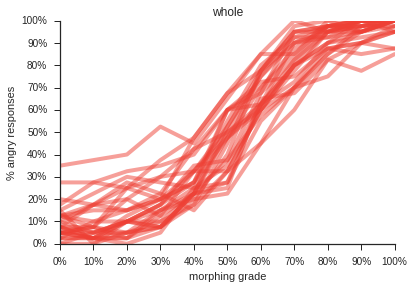

eyes


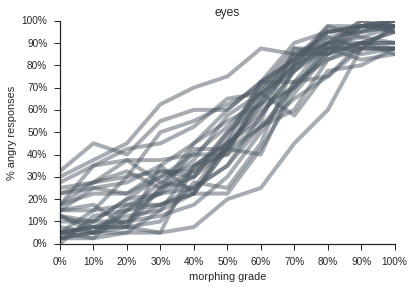

mouth


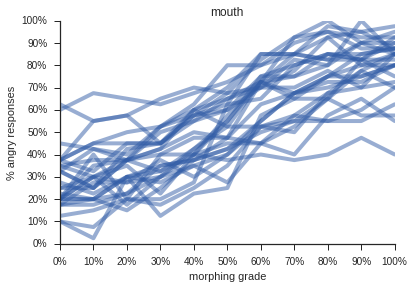

In [27]:
showRaw(exp1Results,['whole','eyes','mouth'])

###Spaghetti plots of all fitted functions

In [28]:
def showAll(df,condOrder,
            colors=myPalette,
            func=rescaledFunc):
    for index,cond in enumerate(condOrder):
        print cond
        condDict = logDict(df,cond,func=func)
        showCurve(condDict,
                  colors[index],
                  cond,
                  [np.arange(0,10001,1000),myTicks],
                  'morphing grade',
                  '% angry'
                 )
        sns.despine()
        yticks(np.arange(0,1.1,0.1),myTicks)
        savefig('fitted'+str(cond)+'.png',dpi=600)
        show()

whole


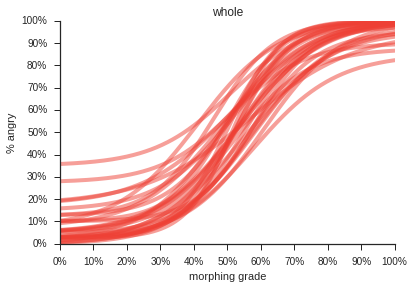

eyes


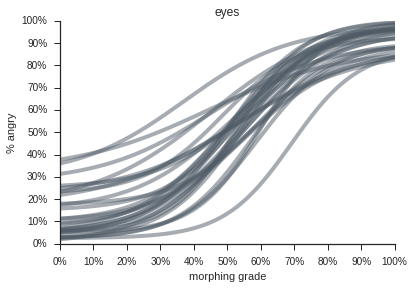

mouth


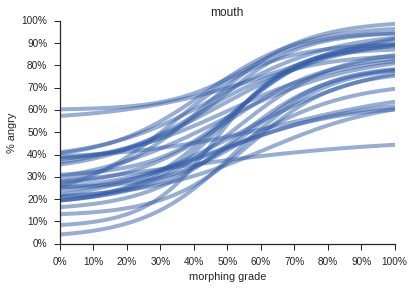

In [29]:
showAll(exp1Results,['whole','eyes','mouth'])

And with the unscaled data for comparison: 

whole


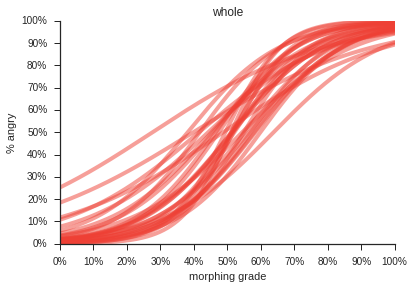

eyes


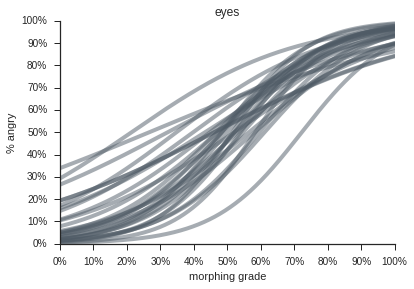

mouth


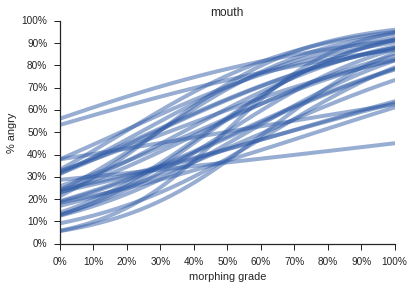

In [30]:
showAll(exp1Results,
        ['whole','eyes','mouth'],
        func=originalFunc)

Overall, a first visual inspection shows that for Experiment 1, it does not seem to make much of a difference whether we rescale the data or not. Since each and every participants responses pass through 50% for all conditions, we would consider both approaches valid.

##Computing the first derivative of the functions

In [32]:
def getDeriv(thisList):
    derivList = []
    for index,x in enumerate(thisList):
        
        try:
            # the following is basically the formula for computing the derivative,
            # but the parameter h is defined by the resolution of the logisitic function
            # we have generated
            thisSlope = (float(thisList[index+1])-thisList[index])/(1./( len(thisList)-1 ))
            derivList.append(thisSlope)
        # this should not work with the very last item (but only with that item!)
        except:
            # if it doesnt work in any other case, throw and exception
            assert index == len(thisList)-1, 'something went wrong'
    return derivList

In [33]:
def showDeriv(curveDict,rgb,myTitle,myX,xLab,yLab):
    for p in curveDict:
        plot(
            getDeriv(curveDict[p]),
            color=rgb,
            alpha=0.5,
            linewidth=4
            )
    title(myTitle)
    xticks(myX[0],myX[1])
    xlabel(xLab)
    ylabel(yLab)
    ylim(0,3.75)
    sns.despine()
    savefig('deriv'+myTitle+'.png',dpi=600)
    show()

In [34]:
def showAllDeriv(df,condOrder,colors=myPalette,func=rescaledFunc):
    for index,cond in enumerate(condOrder):
        condDict = logDict(df,cond,func=func)
        showDeriv(condDict,
                  colors[index],
                  cond,
                  [np.arange(0,10001,1000),myTicks],
                  'morphing grade',
                  'steepness of slope'
                 )

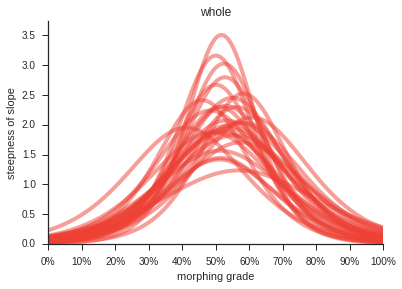

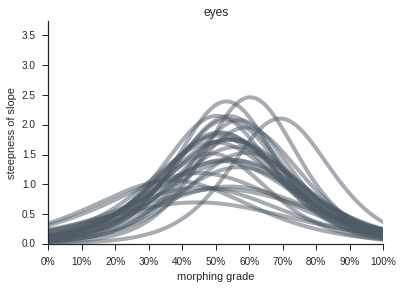

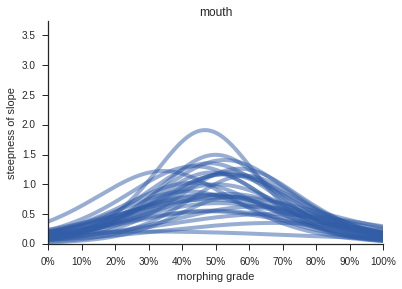

In [35]:
showAllDeriv(exp1Results,['whole','eyes','mouth'])

Comparison of unscaled data:

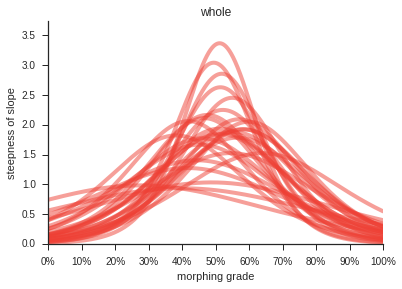

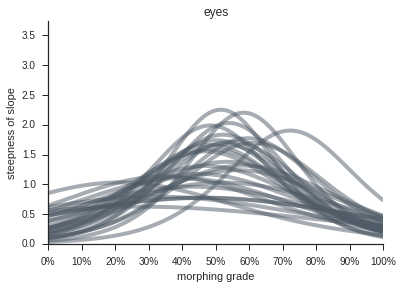

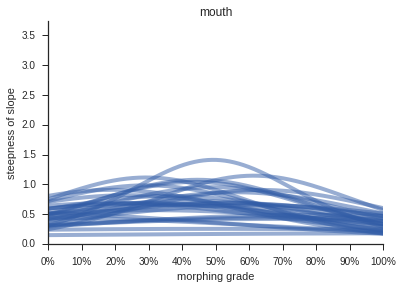

In [36]:
showAllDeriv(exp1Results,['whole','eyes','mouth'],func=originalFunc)

###Extract threshold and slope parameters

The value of the first derivative (on the y-axis) is the slope parameter; its position on the x-axis is the x-intercept.  We extract the point with the highest value.

In [37]:
def getPeak(d,p):
    # starting values are set
    highestVal = -999
    highestPos = -999
    for index,i in enumerate(getDeriv(d[p])):
        if i > highestVal:
            highestVal = i
            highestPos = index
    return highestPos,highestVal

In [38]:
def peakDict(df,func=rescaledFunc):
    d = {}
    for index,cond in enumerate(df.columns.levels[0]):
        d[cond] = {}
        condDict = logDict(df,cond,func=func)
        for p in condDict:
            # get slope and x-threshold form the first derivative
            threshold,slope = getPeak(condDict,p)
            # get value on y-threshold from the original logistic
            # function; this is the value of the logistic function
            # at the point where the value of its derivative is highest ( and this is simply the threshold)
            # we consider this the 'bias' or y-threshold - at which height (y-axis)
            # is the threshold located? i.e. how much is the curve shifted up or down.
            bias = condDict[p][threshold]
            # rescale threshold to value between 0 and 1
            threshold = float(threshold)/len(condDict[p])

            # we call the 
            d[cond][p] = {'slope':slope,'threshold':threshold,'bias':bias}
        
    return d

In [39]:
def peakDf(d):
    for cond in d:
        thisDf = pd.DataFrame(d[cond]).T
        thisDf.index=[[cond]*len(thisDf),thisDf.index]
        try:
            bigDf = pd.concat([bigDf,thisDf])
        except:
            bigDf = thisDf

    return bigDf.unstack(0)

In [40]:
exp1LogFuncTable = peakDf(peakDict(exp1Results))

In [41]:
cols = exp1LogFuncTable.columns.tolist()
# reordering the columns for clarity
cols = [ cols[8],cols[6],cols[7], cols[2],cols[0],cols[1], cols[5],cols[3],cols[4]]
exp1LogFuncTable = exp1LogFuncTable[cols]

In [42]:
exp1LogFuncTable

threshold                          bias                         slope  \
         whole      eyes     mouth     whole      eyes     mouth     whole   
p001  0.511649  0.498050  0.415858  0.562425  0.512472  0.587438  2.296437   
p002  0.555444  0.485551  0.480352  0.487459  0.574928  0.537403  1.821712   
p003  0.459554  0.369063  0.476552  0.562428  0.637425  0.549942  2.412706   
p004  0.519048  0.542646  0.491251  0.462445  0.549984  0.424957  1.903614   
p005  0.575942  0.534947  0.616538  0.424967  0.449890  0.424998  1.705129   
p006  0.516948  0.531547  0.532147  0.512433  0.524891  0.524908  3.508805   
p007  0.582242  0.558844  0.474453  0.537492  0.524888  0.662419  2.524960   
p008  0.511649  0.546145  0.546345  0.587446  0.562433  0.774938  1.564888   
p009  0.549045  0.539546  0.467953  0.499931  0.499802  0.474940  2.453070   
p010  0.520748  0.514649  0.507849  0.574955  0.524972  0.599949  1.867616   
p011  0.524248  0.602640  0.437256  0.512259  0.524978  0.624947  3.026834   
p012  0.411559  0.569043  0.486251  0.537494  0.599946  0.662425  1.952323   
p013  0.561944  0.537546  0.485351  0.487397  0.487459  0.624956  2.297931   
p014  0.529247  0.512149  0.525947  0.512308  0.512414  0.412421  2.316599   
p015  0.531547  0.556144  0.482752  0.524853  0.487374  0.424949  2.071867   
p016  0.536146  0.534447  0.431457  0.524812  0.512359  0.674991  1.985029   
p019  0.499950  0.503750  0.539246  0.512362  0.524999  0.612431  3.161677   
p020  0.513949  0.452155  0.313269  0.587388  0.587415  0.337499  1.442985   
p021  0.608239  0.691731  0.539546  0.512363  0.449848  0.499928  2.123432   
p022  0.533947  0.544346  0.499650  0.524911  0.524954  0.550000  1.937535   
p023  0.483352  0.515748  0.527547  0.512424  0.537445  0.474896  2.238710   
p024  0.500850  0.506449  0.585841  0.549883  0.537452  0.524951  2.671557   
p025  0.567743  0.590141  0.671933  0.562395  0.537374  0.537470  1.233148   
p026  0.527447  0.519748  0.536846  0.524907  0.562467  0.449970  2.797672   
p027  0.487951  0.448155  0.342766  0.537468  0.587389  0.549953  1.874006   
p028  0.581842  0.589341  0.503150  0.499917  0.462392  0.549992  2.034048   
p029  0.565043  0.569843  0.570343  0.474805  0.462486  0.449876  2.034426   
p030  0.509949  0.444056  0.657434  0.674907  0.599944  0.774992  1.415442   

                          
          eyes     mouth  
p001  1.705580  0.880567  
p002  1.517784  1.353848  
p003  1.066301  0.742892  
p004  0.962355  0.557786  
p005  1.418296  0.624480  
p006  2.392012  1.173356  
p007  1.625036  0.826195  
p008  1.742184  0.788172  
p009  2.145561  1.910188  
p010  0.922131  0.683058  
p011  2.461428  1.302983  
p012  1.285799  1.197446  
p013  1.750875  0.813170  
p014  1.873855  1.407359  
p015  1.402491  0.545118  
p016  2.087575  1.024071  
p019  2.150282  1.201446  
p020  0.944290  0.205535  
p021  2.104248  0.787359  
p022  1.765065  1.495067  
p023  1.855976  1.168153  
p024  1.814443  1.142936  
p025  1.530025  0.350917  
p026  1.391004  0.837735  
p027  1.187727  1.222959  
p028  1.952930  0.997454  
p029  2.076668  1.262053  
p030  0.696189  0.500008

save to csv

In [43]:
exp1LogFuncTable.to_csv('data/exp1fittable.txt')

In [44]:
exp1LogFuncTable.describe()

threshold                             bias                        \
           whole       eyes      mouth      whole       eyes      mouth   
count  28.000000  28.000000  28.000000  28.000000  28.000000  28.000000   
mean    0.527758   0.528872   0.505210   0.528030   0.530728   0.546376   
std     0.040681   0.059359   0.078724   0.046852   0.047211   0.106658   
min     0.411559   0.369063   0.313269   0.424967   0.449848   0.337499   
25%     0.511224   0.505774   0.476027   0.509177   0.509219   0.468665   
50%     0.525847   0.534697   0.501400   0.524832   0.524975   0.543706   
75%     0.557069   0.556819   0.539321   0.553011   0.562441   0.615560   
max     0.608239   0.691731   0.671933   0.674907   0.637425   0.774992   

           slope                        
           whole       eyes      mouth  
count  28.000000  28.000000  28.000000  
mean    2.166934   1.636718   0.964368  
std     0.530281   0.465002   0.380377  
min     1.233148   0.696189   0.205535  
25%     1.872408   1.364703   0.727933  
50%     2.053146   1.723882   0.939010  
75%     2.422797   1.983864   1.206824  
max     3.508805   2.461428   1.910188

###violin plots of the curve parameters

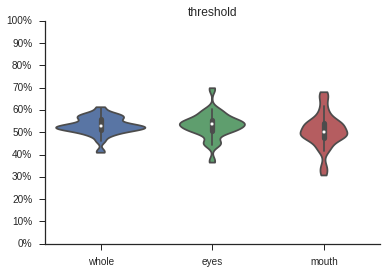

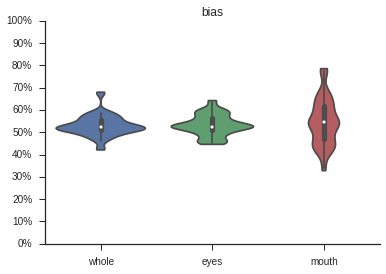

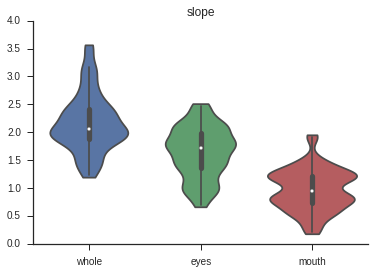

In [46]:
for index, metric in enumerate(['threshold','bias','slope']):
    sns.violinplot(exp1LogFuncTable[metric],
                   inner='box',bw=.3, cut=.3,lw=.3,
                   #color=myPalette
                  )
    title(metric)
    if index <2:
        ylim(0,1)
        yticks(np.arange(0,1.1,0.1),myTicks)
    sns.despine()
    savefig('data/violin_'+metric+'.png',dpi=600)
    show()

###some more elaborate line plots for 100% transparent visualisation, taking repeated measures into account

In [47]:
def plot_curvestats(df,conds,plotname,yname,
                    lw=5,fasp1=6,fasp2=4,ymin=0,ymax=0):
    
    # figure proportions
    f = figure(figsize=(fasp1,fasp2))
    ax = plt.subplot(111)    
    
    # make single participant lineplots
    for p in range(len(df.index)):
        # get the values of all conditions
        this_values = []
        for c in conds:
            this_values.append(df.ix[p][c])
        i = 0
        while i < len(conds)-1:
        # plot all condition
            if this_values[i] > this_values[i+1]:
                plot(
                     [i+.015,i+1],
                     [this_values[i],this_values[i+1]],
                     alpha=0.2,
                     linewidth=lw,
                     c='k',
                     zorder=0
                     )
            if this_values[i] <= this_values[i+1]:
                plot(
                     [i+.015,i+1],
                     [this_values[i],this_values[i+1]],
                     alpha=0.2,
                     linewidth=lw,
                     c='b',
                     zorder=0
                     )
            i+=1
            
    # make aggregated plots (mean + ci)
    
    i = 0
    for c in conds:
        errorbar(i,
                 df[c].mean(),
                 yerr=df[c].std(ddof=1)/sqrt(len(df.index))*1.96,
                 ecolor="r",
                 elinewidth=5,
                 c='r',
                 capsize=5,
                 capthick=5,
                 zorder =1
                 )
        i+=1

    plt.xlim(-0.1,i-0.9)
    plt.xticks(range(len(conds)),conds)
    plt.title(plotname)
    if ymin == 0 and ymax == 0:
        ymin, ymax = ylim() 
    else:
        yticks(np.arange(0,1.1,0.1),myTicks)
    plt.ylim(ymin,ymax)
    plt.xlabel("Face Conditions\n(Raw Data with 95% CI)")
    plt.ylabel(yname)
    
    sns.despine()
    
    plt.savefig((plotname+str(conds)+'.png'),dpi=600)  
    plt.show()

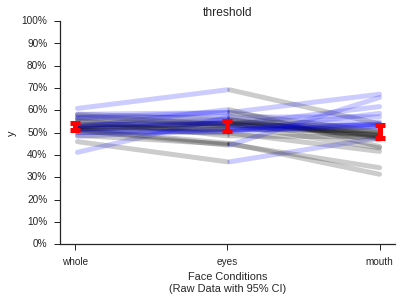

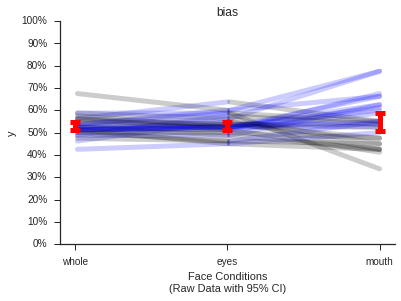

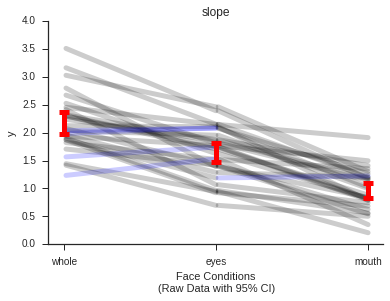

In [48]:
for index, metric in enumerate(['threshold','bias','slope']):
    ymax = 0
    if index <2:
        ymax=1
        
    plot_curvestats(exp1LogFuncTable[metric],['whole','eyes','mouth'],metric,'y',
                   lw=5,fasp1=6,fasp2=4,ymin=0,ymax=ymax)

###t-tests for comparing everything with everything

In [49]:
from scipy import stats

In [50]:
def infStats(df,my_alpha):
    for c1 in df.columns:
        for c2 in df.columns:
            if c1 != c2:
                print c1,c2
                t,p = stats.ttest_rel(df[c1],df[c2])
                w,wp = stats.wilcoxon(df[c1],df[c2])
                if p < my_alpha and wp < my_alpha:
                    sig = '*'
                else:
                    sig = 'n.s.'
                    
                print 't:',round(t,2),'p:',p,'\tw:',round(w,2),'wp:',wp, sig

In [51]:
infStats(exp1LogFuncTable['threshold'],0.05)

whole eyes
t: -0.12 p: 0.907714277369 	w: 196.0 wp: 0.873353767434 n.s.
whole mouth
t: 1.49 p: 0.146924077385 	w: 143.0 wp: 0.171849400485 n.s.
eyes whole
t: 0.12 p: 0.907714277369 	w: 196.0 wp: 0.873353767434 n.s.
eyes mouth
t: 1.45 p: 0.157824063243 	w: 136.0 wp: 0.127088240298 n.s.
mouth whole
t: -1.49 p: 0.146924077385 	w: 143.0 wp: 0.171849400485 n.s.
mouth eyes
t: -1.45 p: 0.157824063243 	w: 136.0 wp: 0.127088240298 n.s.


In [52]:
infStats(exp1LogFuncTable['bias'],0.05)

whole eyes
t: -0.33 p: 0.741298235942 	w: 192.0 wp: 0.802211794992 n.s.
whole mouth
t: -1.05 p: 0.304216883478 	w: 146.0 wp: 0.194297254432 n.s.
eyes whole
t: 0.33 p: 0.741298235942 	w: 192.0 wp: 0.802211794992 n.s.
eyes mouth
t: -0.79 p: 0.436979329309 	w: 167.0 wp: 0.412346527888 n.s.
mouth whole
t: 1.05 p: 0.304216883478 	w: 146.0 wp: 0.194297254432 n.s.
mouth eyes
t: 0.79 p: 0.436979329309 	w: 167.0 wp: 0.412346527888 n.s.


In [53]:
infStats(exp1LogFuncTable['slope'],0.05)

whole eyes
t: 6.28 p: 1.01992107507e-06 	w: 20.0 wp: 3.08403852945e-05 *
whole mouth
t: 13.11 p: 3.16826379711e-13 	w: 0.0 wp: 3.78961944158e-06 *
eyes whole
t: -6.28 p: 1.01992107507e-06 	w: 20.0 wp: 3.08403852945e-05 *
eyes mouth
t: 9.36 p: 5.69576811504e-10 	w: 1.0 wp: 4.22840884725e-06 *
mouth whole
t: -13.11 p: 3.16826379711e-13 	w: 0.0 wp: 3.78961944158e-06 *
mouth eyes
t: -9.36 p: 5.69576811504e-10 	w: 1.0 wp: 4.22840884725e-06 *


##Spaghetti plots with threshold overlaid

In [54]:
def showPeak(curveDict,myColor):
    for p in curveDict:
        highestPos,highestVal = getPeak(curveDict,p)
        plot(highestPos,highestVal,
             'o',
             color=myColor,
             alpha=0.8
            )
    # dont show so it will merge with subsequent plot
    # show()

In [55]:
def allPeaks(df,condOrder,colors=myPalette,func=rescaledFunc):
    for index,cond in enumerate(condOrder):
        condDict = logDict(df,cond,func=func)
        showPeak(condDict,colors[index])
        showDeriv(condDict,
                  colors[index],
                  cond,
                  [np.arange(0,10001,1000),myTicks],
                  'morphing grade',
                  'steepness of slope')

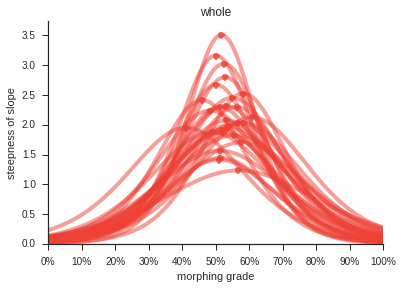

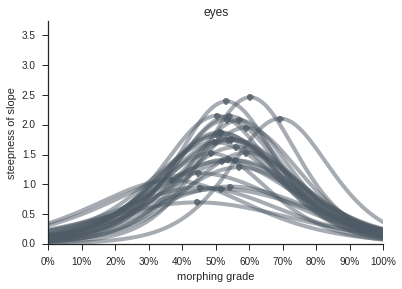

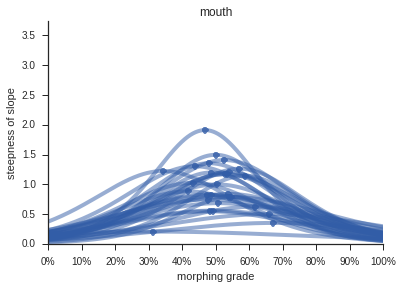

In [56]:
allPeaks(exp1Results,['whole','eyes','mouth'])

In [57]:
def allLogWithPeaks(df,condOrder,colors=myPalette,func=rescaledFunc):
    
    for index,cond in enumerate(condOrder):
        condDict = logDict(df,cond,func=func)
        
        for p in condDict:
            highestPos,highestVal = getPeak(condDict,p)
            
            plot(condDict[p],
                 colors[index],
                 alpha=0.5,
                 linewidth=3)

            plot(highestPos,condDict[p][highestPos],
                 'o',
                 color=colors[index],
                 alpha=0.8
                )

        title(cond)
        xticks(np.arange(0,10001,1000),myTicks)
        yticks(np.arange(0,1.1,0.1),myTicks)
        xlabel('morphing grade',)
        ylabel('% angry responses')
        sns.despine()
        savefig('fitpoint'+cond+'.png',dpi=600)
        show()

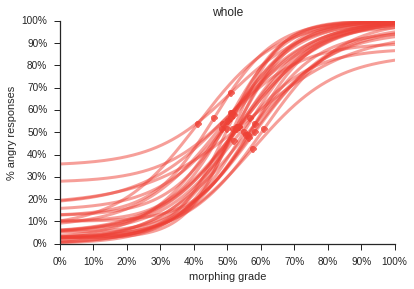

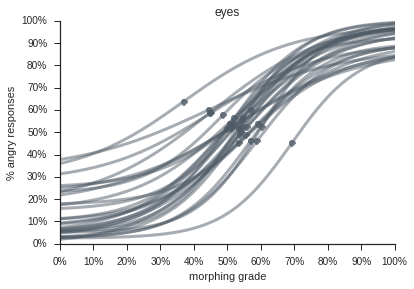

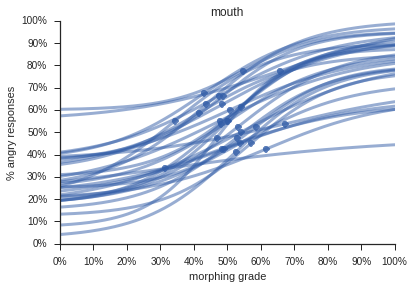

In [58]:
allLogWithPeaks(exp1Results,['whole','eyes','mouth'])

The following plots nicely illustrate why allowing the threshold to vary on the y-axis by rescaling is so critical. Otherwise, the threshold is located at 50% always. This is fine for the current data (experiment 1) but problematic for experiment 2 (see below).

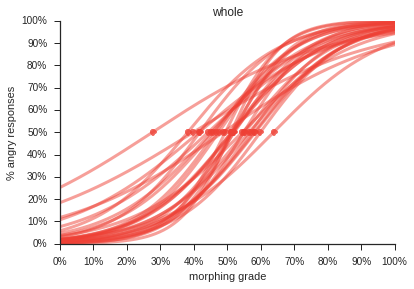

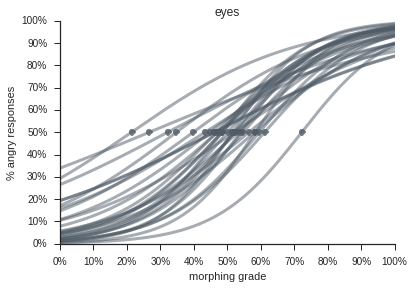

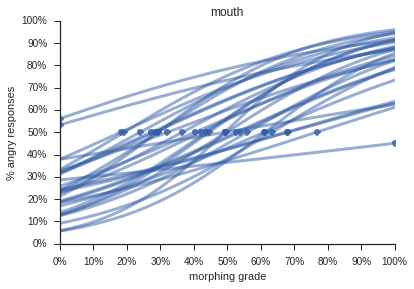

In [59]:
allLogWithPeaks(exp1Results,['whole','eyes','mouth'],func=originalFunc)

#Experiment 2 (Composite Faces)

In [60]:
i = 0
for df in dflist:
    print i,':',df
    i+=1

0 : ./data/Exp1AvgResults.txt
1 : ./data/Exp1AvgResultsAll.txt
2 : ./data/Exp1Pt1MainResults.txt
3 : ./data/Exp1Pt1ResultsAll.txt
4 : ./data/Exp1Pt2MainResults.txt
5 : ./data/Exp1Pt2ResultsAll.txt
6 : ./data/Exp1RtMedian.txt
7 : ./data/Exp1RtMedianAll.txt
8 : ./data/Exp2AvgResults.txt
9 : ./data/Exp2AvgResultsAll.txt
10 : ./data/Exp2Pt1Results.txt
11 : ./data/Exp2Pt1ResultsAll.txt
12 : ./data/Exp2Pt2Results.txt
13 : ./data/Exp2Pt2ResultsAll.txt
14 : ./data/Exp2RtMedian.txt
15 : ./data/Exp2RtMedianAll.txt


In [61]:
exp2Results = pd.read_csv(dflist[8],
                 header=[0,1],
                 index_col=[0])/100

In [62]:
exp2Results

fearLOW                                                                 \
grade     m00    m01    m02    m03    m04    m05    m06    m07    m08    m09   
p                                                                              
p001    0.150  0.250  0.425  0.400  0.425  0.500  0.550  0.625  0.775  0.775   
p002    0.400  0.275  0.575  0.425  0.525  0.500  0.600  0.875  0.800  0.850   
p003    0.100  0.075  0.150  0.100  0.125  0.350  0.525  0.650  0.900  0.900   
p004    0.125  0.175  0.175  0.250  0.250  0.350  0.450  0.600  0.425  0.525   
p005    0.025  0.125  0.175  0.200  0.250  0.350  0.525  0.700  0.825  0.775   
p006    0.400  0.325  0.425  0.375  0.500  0.500  0.525  0.650  0.750  0.650   
p007    0.175  0.225  0.225  0.250  0.225  0.300  0.500  0.550  0.725  0.775   
p008    0.225  0.250  0.275  0.300  0.325  0.400  0.500  0.500  0.600  0.650   
p009    0.425  0.350  0.400  0.400  0.625  0.400  0.500  0.625  0.700  0.750   
p010    0.075  0.150  0.225  0.225  0.250  0.500  0.550  0.525  0.825  0.825   
p011    0.150  0.075  0.100  0.200  0.300  0.375  0.550  0.800  0.700  0.825   
p012    0.075  0.125  0.100  0.175  0.225  0.400  0.500  0.625  0.600  0.850   
p013    0.125  0.175  0.125  0.100  0.225  0.300  0.225  0.400  0.450  0.475   
p015    0.050  0.125  0.125  0.200  0.250  0.400  0.500  0.725  0.675  0.825   
p016    0.075  0.150  0.075  0.175  0.200  0.350  0.450  0.575  0.675  0.775   
p017    0.275  0.250  0.225  0.500  0.450  0.400  0.550  0.725  0.650  0.850   
p018    0.150  0.125  0.150  0.275  0.325  0.475  0.475  0.750  0.750  0.875   
p019    0.250  0.325  0.300  0.375  0.350  0.400  0.500  0.725  0.725  0.775   
p020    0.175  0.150  0.200  0.225  0.250  0.325  0.400  0.500  0.500  0.550   
p021    0.100  0.075  0.150  0.150  0.250  0.375  0.500  0.700  0.800  0.925   
p022    0.225  0.275  0.300  0.425  0.475  0.475  0.650  0.725  0.775  0.875   
p023    0.150  0.200  0.200  0.200  0.300  0.450  0.600  0.850  0.800  0.825   
p024    0.025  0.100  0.200  0.200  0.275  0.450  0.500  0.725  0.825  0.900   
p025    0.500  0.350  0.400  0.400  0.500  0.550  0.550  0.650  0.750  0.750   
p026    0.100  0.125  0.150  0.125  0.225  0.400  0.450  0.700  0.725  0.900   
p027    0.300  0.275  0.125  0.250  0.375  0.400  0.525  0.375  0.550  0.675   
p028    0.100  0.100  0.175  0.275  0.400  0.575  0.775  0.975  0.975  1.000   
p029    0.100  0.125  0.175  0.325  0.200  0.500  0.550  0.650  0.900  0.925   
p030    0.100  0.025  0.125  0.075  0.175  0.350  0.475  0.625  0.775  0.850   

             angerLOW                                                          \
grade    m10      m00    m01    m02    m03    m04    m05    m06    m07    m08   
p                                                                               
p001   0.800    0.250  0.325  0.325  0.450  0.375  0.525  0.625  0.675  0.750   
p002   0.875    0.275  0.525  0.525  0.525  0.600  0.575  0.750  0.875  0.675   
p003   0.975    0.225  0.100  0.225  0.200  0.400  0.575  0.825  0.850  0.925   
p004   0.600    0.350  0.375  0.475  0.600  0.575  0.550  0.650  0.650  0.775   
p005   0.925    0.175  0.225  0.200  0.250  0.425  0.550  0.700  0.900  0.925   
p006   0.775    0.325  0.350  0.375  0.425  0.575  0.600  0.650  0.725  0.675   
p007   0.850    0.300  0.375  0.325  0.325  0.375  0.450  0.675  0.900  0.800   
p008   0.725    0.225  0.300  0.350  0.425  0.600  0.650  0.650  0.675  0.750   
p009   0.825    0.325  0.450  0.400  0.475  0.425  0.500  0.600  0.675  0.875   
p010   0.875    0.325  0.100  0.275  0.300  0.350  0.525  0.700  0.775  0.825   
p011   0.925    0.075  0.175  0.200  0.200  0.300  0.400  0.600  0.725  0.825   
p012   0.925    0.225  0.225  0.300  0.275  0.425  0.475  0.650  0.675  0.925   
p013   0.625    0.325  0.275  0.350  0.300  0.375  0.475  0.325  0.575  0.550   
p015   0.850    0.125  0.200  0.200  0.300  0.325  0.475  0.500  0.675  0.850   
p016   0.950    0.175  0.200  0.250  0.275  0.375  0.450  0.550  0.6

###Spaghetti plots of raw data

angerLOW


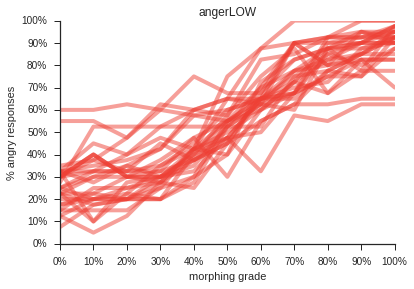

angerUP


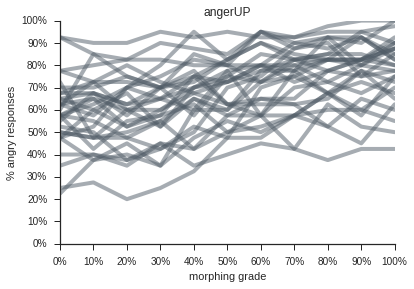

fearLOW


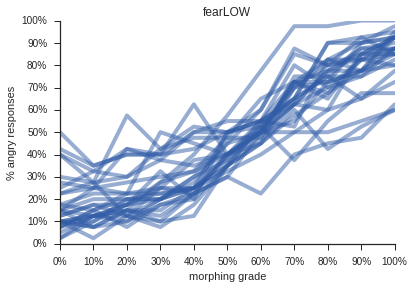

fearUP


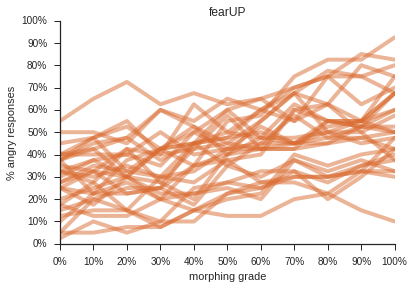

In [63]:
showRaw(exp2Results,['angerLOW','angerUP','fearLOW','fearUP'])

###fitted functions

In [64]:
def showAllGrouped(df,condOrder,
            colors=myPalette,
            func=rescaledFunc):
    for index,cond in enumerate(condOrder):
        print cond
        condDict = logDict(df,cond,func=func)
        showCurve(condDict,
                  colors[index],
                  cond,
                  [np.arange(0,10001,1000),np.arange(0,1.01,0.1)],
                  'morphing grade',
                  '% angry'
                 )

angerLOW


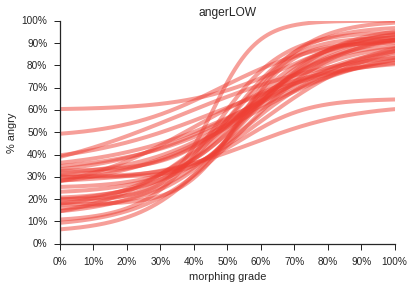

angerUP


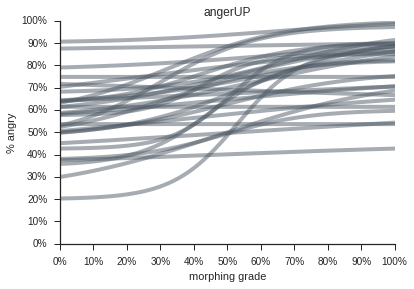

fearLOW


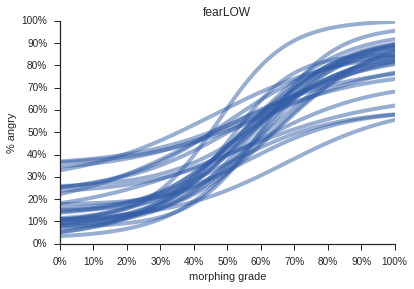

fearUP


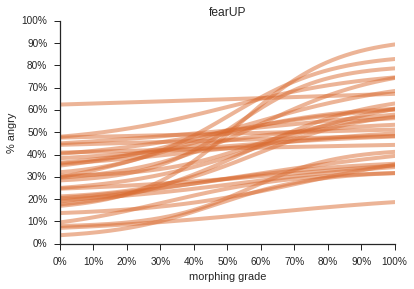

In [65]:
showAll(exp2Results,exp2Results.columns.levels[0])

###1st derivatives

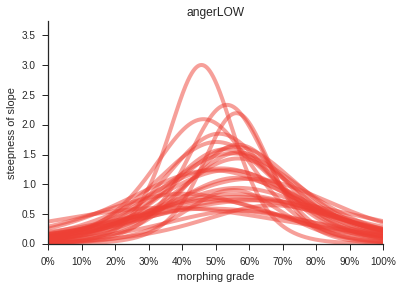

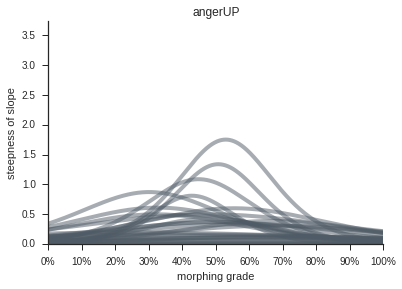

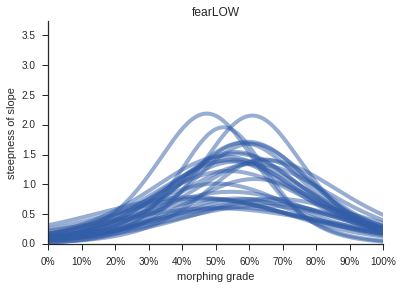

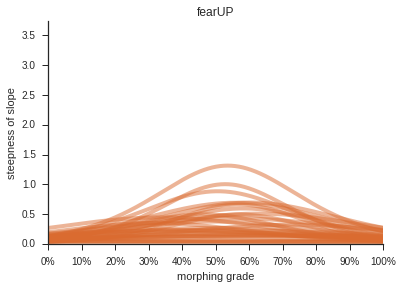

In [66]:
showAllDeriv(exp2Results,['angerLOW','angerUP','fearLOW','fearUP'])

In [67]:
exp2LogFuncTable = peakDf(peakDict(exp2Results))
cols = exp2LogFuncTable.columns.tolist()
cols = [ cols[8],cols[10],cols[9],cols[11] ,  cols[0],cols[2],cols[1],cols[3] , cols[4],cols[6],cols[5],cols[7] ]
exp2LogFuncTable = exp2LogFuncTable[cols]

In [68]:
exp2LogFuncTable

threshold                                    bias                      \
      angerLOW   fearLOW   angerUP    fearUP  angerLOW   fearLOW   angerUP   
p001  0.549045  0.428857  0.389161  0.481052  0.562468  0.474925  0.562496   
p002  0.357464  0.455454  0.667333  0.393461  0.574949  0.574960  0.812471   
p003  0.463154  0.609139  0.438256  0.568843  0.524951  0.524877  0.637500   
p004  0.482052  0.503950  0.428657  0.335666  0.599963  0.362441  0.712452   
p005  0.509449  0.552045  0.623838  0.606039  0.574852  0.474983  0.949994   
p006  0.619738  0.555444  0.535846  0.999800  0.649953  0.549982  0.674996   
p007  0.561444  0.642536  0.548045  0.554745  0.599974  0.512459  0.887498   
p008  0.402660  0.607339  0.508349  0.538646  0.524959  0.474952  0.749985   
p009  0.575742  0.634937  0.999800  0.155884  0.599994  0.587492  0.666136   
p010  0.490151  0.537646  0.580042  0.725027  0.524902  0.474962  0.724971   
p011  0.547745  0.560844  0.448755  0.505449  0.512427  0.499850  0.587489   
p012  0.566843  0.614039  0.554045  0.568843  0.587459  0.499915  0.699963   
p013  0.573743  0.675132  0.537446  0.676032  0.449951  0.362426  0.499999   
p015  0.536046  0.536746  0.631137  0.000000  0.499927  0.449928  0.536365   
p016  0.601040  0.649535  0.321768  0.556144  0.549947  0.512497  0.649996   
p017  0.566943  0.544946  0.486751  0.476052  0.599918  0.537425  0.399996   
p018  0.568543  0.556544  0.685431  0.708129  0.599867  0.512442  0.849988   
p019  0.564544  0.616038  0.675432  0.420458  0.599937  0.562482  0.774995   
p020  0.481152  0.561944  0.529647  0.535346  0.699930  0.374960  0.537343   
p021  0.502250  0.579642  0.485251  0.462454  0.474901  0.499894  0.487458   
p022  0.565843  0.503450  0.979102  0.546145  0.612424  0.549973  0.747728   
p023  0.526047  0.522848  0.507349  0.601040  0.562386  0.499973  0.662481   
p024  0.516548  0.525947  0.475952  0.316268  0.549916  0.474890  0.487487   
p025  0.671333  0.622838  0.425857  0.498750  0.787467  0.612468  0.762467   
p026  0.565743  0.605739  0.327067  0.625837  0.662459  0.512340  0.787460   
p027  0.551245  0.498050  0.976902  0.479852  0.474961  0.399941  0.613639   
p028  0.457154  0.473053  0.301370  0.528147  0.599725  0.549835  0.724975   
p029  0.533247  0.558844  0.251475  0.386361  0.549832  0.524855  0.749983   
p030  0.559844  0.594641  0.494851  0.581942  0.562343  0.474984  0.624983   

                   slope                                    
        fearUP  angerLOW   fearLOW       angerUP    fearUP  
p001  0.424984  0.834755  0.783572  1.580786e-01  0.166005  
p002  0.424989  0.606712  0.759395  3.847579e-01  0.118639  
p003  0.437485  2.093929  2.154223  1.405494e-01  0.491733  
p004  0.424988  0.591612  0.747609  8.080502e-01  0.443633  
p005  0.137498  1.849724  1.415070  1.133891e-01  0.142007  
p006  0.511726  0.730381  0.612147  6.666430e-02  0.037438  
p007  0.274990  2.194922  1.418098  2.376826e-02  0.189414  
p008  0.524987  0.840455  0.752423  3.624536e-01  0.432326  
p009  0.449998  0.745337  0.642095 -4.235571e-02  0.042482  
p010  0.274998  1.234805  1.222997  3.273043e-01  0.322235  
p011  0.574920  1.519367  1.516674  1.085386e+00  0.882807  
p012  0.249944  1.433742  1.343261  5.974268e-01  0.660127  
p013  0.312491  0.557379  0.757692  9.688512e-02  0.125825  
p015  0.408583  1.237714  1.399989  7.903866e-07  0.039892  
p016  0.412448  1.091507  1.405046  4.954631e-01  0.689743  
p017  0.287485  0.939315  0.873992  5.784401e-02  0.229794  
p018  0.537486  1.533890  1.379141  1.211713e-01  0.146229  
p019  0.274979  1.108939  1.088629  3.048262e-01  0.208005  
p020  0.537500  0.742235  0.761952  1.750982e+00  1.313661  
p021  0.174982  1.710924  1.695725  4.319299e-01  0.495434  
p022  0.650000  0.788684  1.011642  5.770151e-07  0.049051  
p023  0.537441  1.586671  1.957841  1.337147e+00  0.693325  
p024  0.187466  1.266291  1.468743  4.970951e-01  0.349926  
p025  0.612467  0.646251  0.693284  4.847925e-01  0.373887  


In [69]:
exp2LogFuncTable.describe()

threshold                                        bias             \
        angerLOW    fearLOW    angerUP     fearUP   angerLOW    fearLOW   
count  29.000000  29.000000  29.000000  29.000000  29.000000  29.000000   
mean    0.533336   0.563040   0.545342   0.511463   0.574922   0.497349   
std     0.063019   0.060222   0.187214   0.179162   0.069441   0.062714   
min     0.357464   0.428857   0.251475   0.000000   0.449951   0.362426   
25%     0.502250   0.525947   0.438256   0.462454   0.524959   0.474952   
50%     0.549045   0.558844   0.508349   0.535346   0.574852   0.499973   
75%     0.566843   0.609139   0.623838   0.581942   0.599963   0.537425   
max     0.671333   0.675132   0.999800   0.999800   0.787467   0.612468   

                                 slope                                   
         angerUP     fearUP   angerLOW    fearLOW    angerUP     fearUP  
count  29.000000  29.000000  29.000000  29.000000  29.000000  29.000000  
mean    0.674596   0.412750   1.290401   1.227091   0.401472   0.387709  
std     0.129249   0.135167   0.606132   0.474071   0.428940   0.313439  
min     0.399996   0.137498   0.557379   0.597099  -0.042356   0.037438  
25%     0.587489   0.287485   0.788684   0.759395   0.096885   0.146229  
50%     0.674996   0.424989   1.234805   1.343261   0.327304   0.322235  
75%     0.749985   0.524987   1.629243   1.516674   0.497095   0.507261  
max     0.949994   0.650000   3.004358   2.187706   1.750982   1.313661

save to csv

In [70]:
exp2LogFuncTable.to_csv('data/exp2fittable.txt')

###violin plots

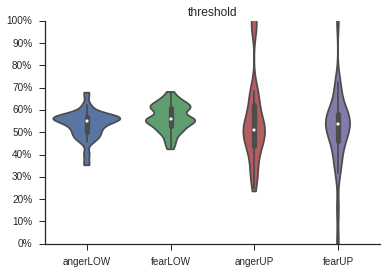

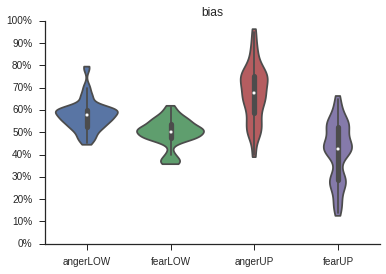

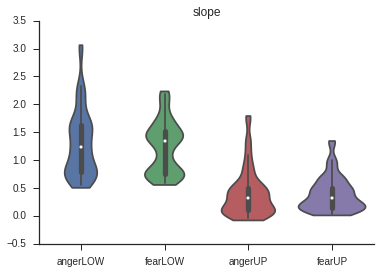

In [71]:
for index, metric in enumerate(['threshold','bias','slope']):
    sns.violinplot(exp2LogFuncTable[metric],
                   inner='box',bw=.3, cut=.3,lw=.3,
                   #color=myPalette
                  )
    title(metric)
    if index <2:
        ylim(0,1)
        yticks(np.arange(0,1.1,0.1),myTicks)
    sns.despine()
    savefig('data/violin_exp2_'+metric+'.png',dpi=600)
    show()

###line plots

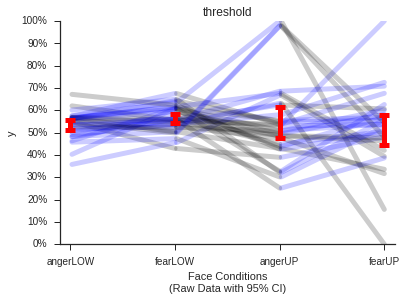

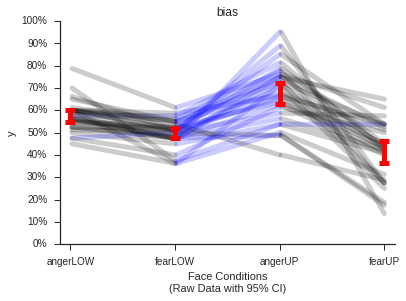

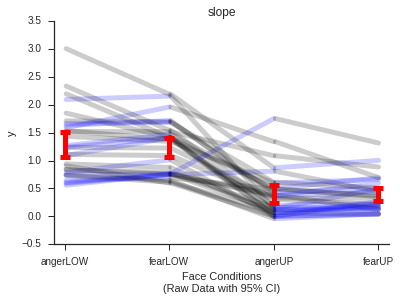

In [72]:
for index, metric in enumerate(['threshold','bias','slope']):
    ymax=0
    if index <2:
        ymax=1
    plot_curvestats(exp2LogFuncTable[metric],
                    exp2LogFuncTable[metric].columns,
                    metric,'y',lw=5,fasp1=6,fasp2=4,ymin=0,ymax=ymax)

###t-tests

In [73]:
infStats(exp2LogFuncTable['threshold'],0.05)

angerLOW fearLOW
t: -2.4 p: 0.023170281426 	w: 116.0 wp: 0.0281811829072 *
angerLOW angerUP
t: -0.33 p: 0.741285902731 	w: 215.0 wp: 0.956888952108 n.s.
angerLOW fearUP
t: 0.66 p: 0.515318675767 	w: 198.0 wp: 0.673278736316 n.s.
fearLOW angerLOW
t: 2.4 p: 0.023170281426 	w: 116.0 wp: 0.0281811829072 *
fearLOW angerUP
t: 0.48 p: 0.63813933986 	w: 160.5 wp: 0.217740533516 n.s.
fearLOW fearUP
t: 1.53 p: 0.136687251462 	w: 130.0 wp: 0.0584869701819 n.s.
angerUP angerLOW
t: 0.33 p: 0.741285902731 	w: 215.0 wp: 0.956888952108 n.s.
angerUP fearLOW
t: -0.48 p: 0.63813933986 	w: 160.5 wp: 0.217740533516 n.s.
angerUP fearUP
t: 0.65 p: 0.521206348803 	w: 201.0 wp: 0.721254399159 n.s.
fearUP angerLOW
t: -0.66 p: 0.515318675767 	w: 198.0 wp: 0.673278736316 n.s.
fearUP fearLOW
t: -1.53 p: 0.136687251462 	w: 130.0 wp: 0.0584869701819 n.s.
fearUP angerUP
t: -0.65 p: 0.521206348803 	w: 201.0 wp: 0.721254399159 n.s.


In [74]:
infStats(exp2LogFuncTable['bias'],0.05)

angerLOW fearLOW
t: 5.83 p: 2.91153645855e-06 	w: 7.0 wp: 5.32182652461e-06 *
angerLOW angerUP
t: -4.32 p: 0.000176506124218 	w: 52.0 wp: 0.00034538711039 *
angerLOW fearUP
t: 6.83 p: 2.03107544923e-07 	w: 15.0 wp: 1.19390311514e-05 *
fearLOW angerLOW
t: -5.83 p: 2.91153645855e-06 	w: 7.0 wp: 5.32182652461e-06 *
fearLOW angerUP
t: -7.74 p: 1.95071615281e-08 	w: 10.0 wp: 7.22960550776e-06 *
fearLOW fearUP
t: 3.27 p: 0.00285162990724 	w: 94.0 wp: 0.00757461902747 *
angerUP angerLOW
t: 4.32 p: 0.000176506124218 	w: 52.0 wp: 0.00034538711039 *
angerUP fearLOW
t: 7.74 p: 1.95071615281e-08 	w: 10.0 wp: 7.22960550776e-06 *
angerUP fearUP
t: 7.95 p: 1.17965938047e-08 	w: 1.0 wp: 2.84890331208e-06 *
fearUP angerLOW
t: -6.83 p: 2.03107544923e-07 	w: 15.0 wp: 1.19390311514e-05 *
fearUP fearLOW
t: -3.27 p: 0.00285162990724 	w: 94.0 wp: 0.00757461902747 *
fearUP angerUP
t: -7.95 p: 1.17965938047e-08 	w: 1.0 wp: 2.84890331208e-06 *


In [75]:
infStats(exp2LogFuncTable['slope'],0.05)

angerLOW fearLOW
t: 1.12 p: 0.272024085878 	w: 201.0 wp: 0.721254399159 n.s.
angerLOW angerUP
t: 6.69 p: 2.89729611796e-07 	w: 21.0 wp: 2.14766190022e-05 *
angerLOW fearUP
t: 8.18 p: 6.69915726825e-09 	w: 7.0 wp: 5.32182652461e-06 *
fearLOW angerLOW
t: -1.12 p: 0.272024085878 	w: 201.0 wp: 0.721254399159 n.s.
fearLOW angerUP
t: 7.9 p: 1.31642823427e-08 	w: 19.0 wp: 1.76907157933e-05 *
fearLOW fearUP
t: 9.94 p: 1.09433438896e-10 	w: 5.0 wp: 4.32894050003e-06 *
angerUP angerLOW
t: -6.69 p: 2.89729611796e-07 	w: 21.0 wp: 2.14766190022e-05 *
angerUP fearLOW
t: -7.9 p: 1.31642823427e-08 	w: 19.0 wp: 1.76907157933e-05 *
angerUP fearUP
t: 0.35 p: 0.731827027433 	w: 200.0 wp: 0.705128996463 n.s.
fearUP angerLOW
t: -8.18 p: 6.69915726825e-09 	w: 7.0 wp: 5.32182652461e-06 *
fearUP fearLOW
t: -9.94 p: 1.09433438896e-10 	w: 5.0 wp: 4.32894050003e-06 *
fearUP angerUP
t: -0.35 p: 0.731827027433 	w: 200.0 wp: 0.705128996463 n.s.


###thresholds visualised

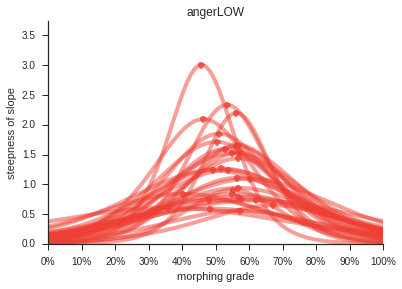

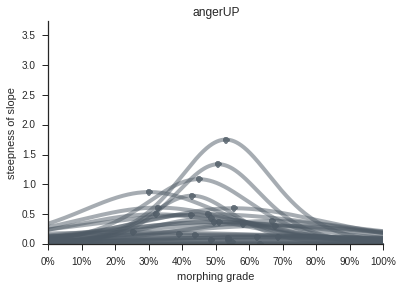

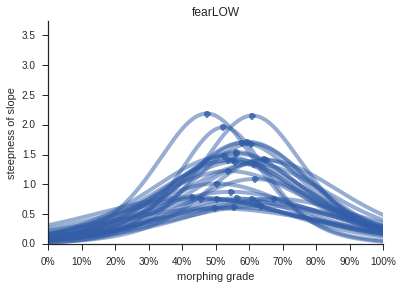

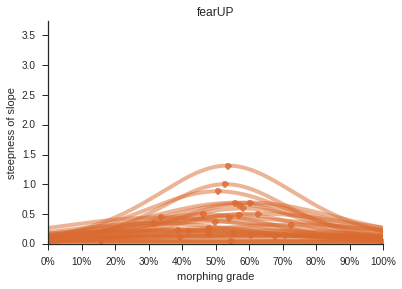

In [76]:
allPeaks(exp2Results,['angerLOW','angerUP','fearLOW','fearUP'])

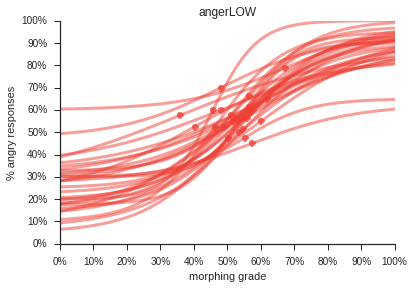

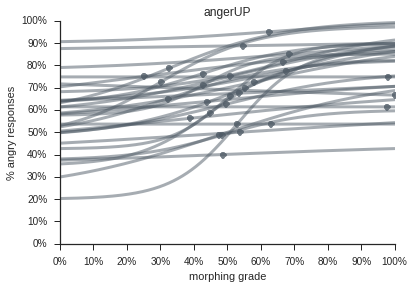

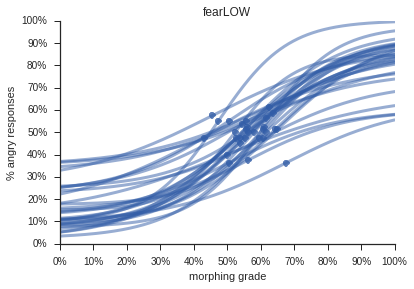

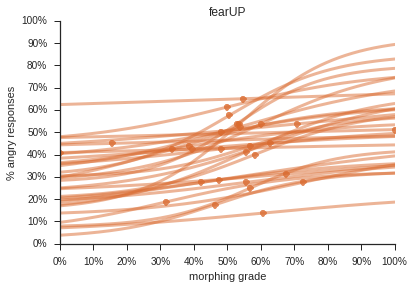

In [77]:
allLogWithPeaks(exp2Results,['angerLOW','angerUP','fearLOW','fearUP'])

###The same procedure with unscaled data shows that the slopes are located outside the response spectrum for the strongly biased conditions

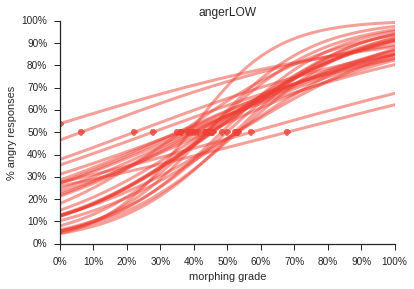

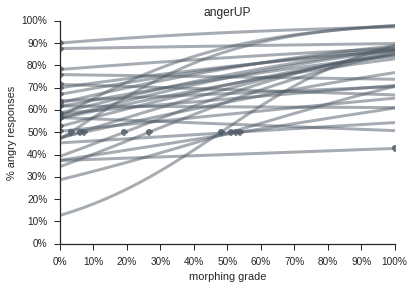

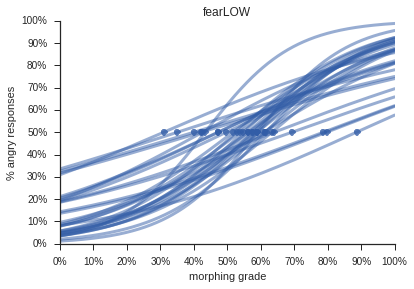

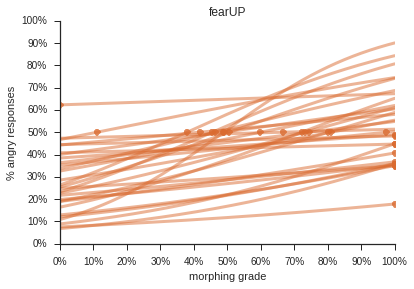

In [78]:
allLogWithPeaks(exp2Results,['angerLOW','angerUP','fearLOW','fearUP'],func=originalFunc)

###visualisation with upper half / lower half conditions clusterd

In [79]:
def allLogWithPeaksClusterd(df,colors=myPalette,func=rescaledFunc):
    
    for index,cond in enumerate([u'fearLOW',u'angerLOW',u'fearUP',u'angerUP']):
        condDict = logDict(df,cond,func=func)
        
        for p in condDict:
            highestPos,highestVal = getPeak(condDict,p)
            
            plot(condDict[p],
                 colors[index],
                 alpha=0.5,
                 linewidth=3)

            plot(highestPos,condDict[p][highestPos],
                 'o',
                 color=colors[index],
                 alpha=0.8
                )

        title(cond)
        xticks(np.arange(0,10001,1000),np.arange(0,1.01,0.1))
        xlabel('morphing grade',)
        ylabel('% angry responses')
        sns.despine()
        
        if (index+1)%2==0:
            show()

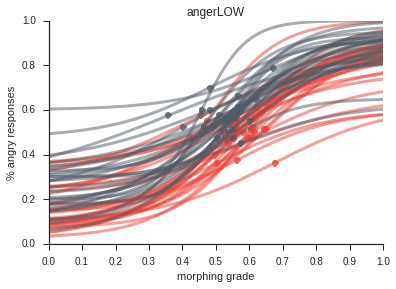

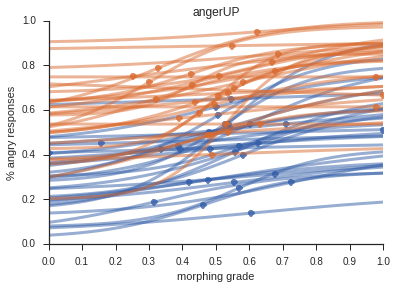

In [80]:
allLogWithPeaksClusterd(exp2Results)

#Get Logistic data for cross-validation

We save all the fitted logistic functions to re-use them in the next notebook, where they will be used to predict out-of sample data. Therefore, we fit the functions separately to part one and part two of the experiment. 

In [81]:
i = 0
for df in dflist:
    print i,':',df
    i+=1

0 : ./data/Exp1AvgResults.txt
1 : ./data/Exp1AvgResultsAll.txt
2 : ./data/Exp1Pt1MainResults.txt
3 : ./data/Exp1Pt1ResultsAll.txt
4 : ./data/Exp1Pt2MainResults.txt
5 : ./data/Exp1Pt2ResultsAll.txt
6 : ./data/Exp1RtMedian.txt
7 : ./data/Exp1RtMedianAll.txt
8 : ./data/Exp2AvgResults.txt
9 : ./data/Exp2AvgResultsAll.txt
10 : ./data/Exp2Pt1Results.txt
11 : ./data/Exp2Pt1ResultsAll.txt
12 : ./data/Exp2Pt2Results.txt
13 : ./data/Exp2Pt2ResultsAll.txt
14 : ./data/Exp2RtMedian.txt
15 : ./data/Exp2RtMedianAll.txt


In [83]:
def getPt(whichPt):
    ptResults = pd.read_csv(dflist[whichPt],
                            header=[0,1],
                            index_col=[0])/100
    return ptResults

These are the tables for the separate experiment parts:

In [84]:
ex1pt1 = getPt(2)
ex1pt2 = getPt(4)

ex2pt1 = getPt(10)
ex2pt2 = getPt(12)

Example:  
The raw data from part 1 are shown in blue
The fitted function is shown in green
By sampling every 1000th point from that function (red), we get a data set that is equal in structure to the raw data.

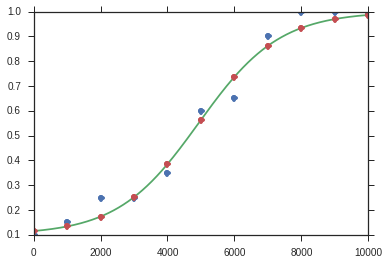

In [85]:
plot(np.arange(0,10001,1000),ex1pt1['whole'].ix['p001'],'o')
plot(rescaledFunc(ex1pt1['whole'].ix['p001']))
plot(np.arange(0,10001,1000),rescaledFunc(ex1pt1['whole'].ix['p001'])[::1000],'o')

In [86]:
def makeFitTable(pt):

    for cond in pt.columns.levels[0]:
        d = {}
        for p in pt.index:
            # the fine-rained nature of the logistic data requires
            # that we extract every 1000th point 
            d[p] = rescaledFunc(pt[cond].ix[p])[::1000]

        thisDf = pd.DataFrame(d).T
        thisDf.columns = ['m00','m01','m02','m03','m04','m05','m06','m07','m08','m09','m10']
        thisDf.index = [[cond]*len(thisDf), thisDf.index]
        try:
            ptLogistic = pd.concat([ptLogistic,thisDf],axis=0)
        except:
            ptLogistic = thisDf

    ptLogistic = ptLogistic.unstack().T.unstack(0)
    return ptLogistic

Example:

In [87]:
makeFitTable(ex1pt1)

eyes                                                              \
           m00       m01       m02       m03       m04       m05       m06   
p001  0.035055  0.063374  0.111919  0.190101  0.304191  0.448808  0.602633   
p002  0.175276  0.203768  0.259525  0.355992  0.492049  0.637449  0.753258   
p003  0.343028  0.388075  0.448351  0.523192  0.607949  0.694488  0.773986   
p004  0.283069  0.303089  0.333588  0.377854  0.437790  0.511739  0.593187   
p005  0.035731  0.061532  0.103728  0.169026  0.261911  0.379350  0.507560   
p006  0.060782  0.075761  0.110218  0.184077  0.320941  0.517470  0.716612   
p007  0.106250  0.115227  0.136540  0.184660  0.281975  0.441272  0.629488   
p008  0.165266  0.180653  0.210426  0.265056  0.356181  0.486437  0.636768   
p009  0.009248  0.021439  0.048863  0.107313  0.218713  0.391966  0.591460   
p010  0.137865  0.161995  0.199494  0.254914  0.331024  0.425650  0.529760   
p011  0.002133  0.005693  0.015104  0.039451  0.099096  0.227556  0.441022   
p012  0.273775  0.291150  0.319910  0.365254  0.431536  0.518437  0.617455   
p013  0.030283  0.056857  0.104111  0.182607  0.299343  0.447216  0.600697   
p014  0.068740  0.089090  0.129647  0.205120  0.329169  0.496676  0.671563   
p015  0.091814  0.119666  0.163466  0.228505  0.317296  0.425550  0.540725   
p016  0.063661  0.079108  0.110824  0.172249  0.278791  0.432520  0.604248   
p019  0.054149  0.062302  0.085871  0.149789  0.296845  0.536585  0.770562   
p020  0.264495  0.283054  0.322660  0.398313  0.516391  0.652968  0.765474   
p021  0.005288  0.011072  0.023011  0.047101  0.093557  0.175799  0.301520   
p022  0.066963  0.083538  0.115180  0.172676  0.268375  0.406553  0.570019   
p023  0.169179  0.188836  0.226779  0.295159  0.404401  0.549283  0.700423   
p024  0.157112  0.166616  0.188208  0.234820  0.325219  0.468991  0.638495   
p025  0.160975  0.172769  0.196444  0.241633  0.320156  0.436668  0.574548   
p026  0.224978  0.246677  0.285015  0.348205  0.441320  0.558123  0.678302   
p027  0.281646  0.308716  0.355537  0.429976  0.533797  0.654960  0.770139   
p028  0.006887  0.015983  0.036601  0.081365  0.170092  0.317991  0.505438   
p029  0.006761  0.015033  0.033053  0.070940  0.144995  0.271079  0.442537   
p030  0.395626  0.420462  0.456228  0.504839  0.565966  0.635736  0.707087   

                                                 mouth                      \
           m07       m08       m09       m10       m00       m01       m02   
p001  0.738538  0.840281  0.907397  0.948053  0.256650  0.292185  0.344578   
p002  0.825765  0.864550  0.883565  0.892487  0.261547  0.275511  0.304911   
p003  0.840233  0.891098  0.927752  0.952974  0.259357  0.298603  0.346806   
p004  0.672406  0.740667  0.793611  0.831422  0.200407  0.222889  0.253099   
p005  0.626925  0.722669  0.790696  0.834975  0.246170  0.268032  0.298012   
p006  0.858453  0.936105  0.972601  0.988521  0.206153  0.241654  0.294911   
p007  0.782289  0.872857  0.916890  0.936236  0.412489  0.444903  0.490122   
p008  0.772809  0.871364  0.931844  0.965258  0.575570  0.592934  0.619890   
p009  0.755098  0.855930  0.907531  0.931441  0.105569  0.115622  0.142708   
p010  0.629967  0.714744  0.778982  0.823710  0.336336  0.357206  0.387793   
p011  0.678771  0.849831  0.938105  0.975957  0.320902  0.341680  0.380660   
p012  0.713749  0.793997  0.852706  0.891689  0.343323  0.378773  0.436695   
p013  0.730338  0.822108  0.879253  0.912043  0.331388  0.355551  0.395199   
p014  0.811349  0.901106  0.950912  0.976331  0.015329  0.032865  0.068704   
p015  0.646792  0.732250  0.793989  0.835165  0.250747  0.273731  0.304022   
p016  0.748941  0.844597  0.898122  0.925311  0.344825  0.376883  0.427054   
p019  0.908595  0.967349  0.988828  0.996235  0.308045  0.317215  0.336288   
p020  0.835006  0.870646  0.887171  0.894476  0.266139  0.281907  0.299829   
p021  0.456300  0.603158  0.711824  0.778336  0.288341  0.311823  0.347198   
p022  0.723389  0.838992  0.912

save as csv for re-use in the next notebook

In [88]:
def savePandas(where,df,csv):
    #os.chdir(where)
    df.to_csv(where+csv)

In [89]:
my_folder = './data/'

savePandas(my_folder,makeFitTable(ex1pt1),'exp1Pt1Logistic.txt')
savePandas(my_folder,makeFitTable(ex1pt2),'exp1Pt2Logistic.txt')
savePandas(my_folder,makeFitTable(ex2pt1),'exp2Pt1Logistic.txt')
savePandas(my_folder,makeFitTable(ex2pt2),'exp2Pt2Logistic.txt')